In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from IPython.display import Image
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

In [26]:
# Cargamos el dataset
file_path = 'data_evaluacion_decoded.csv'
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataset
df.head()

,Unnamed: 0,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1,1


In [27]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0,1
1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2,1
2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1,1
3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1,1
4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1,1


In [28]:
x=df.drop(['salario'], axis=1)
x

,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo
0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0
1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2
2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1
3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1
4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,9,13,1,1,9,4,0,0,0,36,1,1
48838,64,321403,11,9,1,2,9,2,1,0,0,40,1,1
48839,38,374983,9,13,0,0,9,4,1,0,0,50,1,1
48840,44,83891,9,13,1,3,0,1,1,1,0,40,1,1


In [29]:
y=df['salario']
y

0        1
1        1
2        1
3        1
4        1
        ..
48837    1
48838    1
48839    1
48840    1
48841    0
Name: salario, Length: 48842, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [31]:
# Crear el escalador y ajustarlo solo con el conjunto de entrenamiento
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=4,random_state=1)
# Entrenar el modelo
arbol.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [33]:
#Realizamos las predicciones
y_pred = arbol.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Evalaucion del modelo
print('Train Accuracy : %.5f' % arbol.score(x_train, y_train))
print('Test Accuracy : %.5f' % arbol.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Train Accuracy : 0.83267
Test Accuracy : 0.83369
Precisión del modelo: 0.8336859346208968


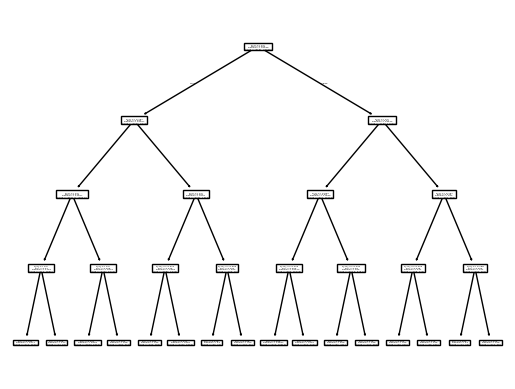

In [36]:
tree.plot_tree(arbol)
plt.show()